In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [114]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [115]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [116]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

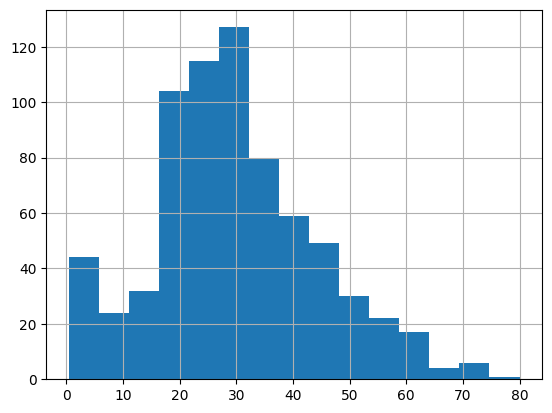

In [117]:
train['Age'].hist(bins=15) # imputation with median

In [118]:
train['Embarked'].value_counts() # fill with often values

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [119]:
train_data = train.copy()

In [120]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [121]:
train_data = train_data.drop(['PassengerId', 'Cabin', 'Name', 'Ticket'], axis=1)

In [122]:
train_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [123]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [124]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median(skipna=True))

In [125]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [126]:
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].value_counts().idxmax())

In [127]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [128]:
# One Hot encoder , Dummy variables

In [129]:
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'])

In [130]:
train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,False,True,False,False,True
887,1,1,19.0,0,0,30.0000,True,False,False,False,True
888,0,3,28.0,1,2,23.4500,True,False,False,False,True
889,1,1,26.0,0,0,30.0000,False,True,True,False,False


In [131]:
train_data = train_data.drop('Sex_male', axis=1)

In [132]:
train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,False,False,True
1,1,1,38.0,1,0,71.2833,True,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,True
4,0,3,35.0,0,0,8.0500,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,False,False,False,True
887,1,1,19.0,0,0,30.0000,True,False,False,True
888,0,3,28.0,1,2,23.4500,True,False,False,True
889,1,1,26.0,0,0,30.0000,False,True,False,False


In [133]:
train_data['travel_alone'] = np.where((train_data['SibSp'] + train_data['Parch']) > 0, 0, 1)

In [134]:
train_data = train_data.drop(['SibSp', 'Parch'], axis=1)

In [135]:
train_data

,Survived,Pclass,Age,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S,travel_alone
0,0,3,22.0,7.2500,False,False,False,True,0
1,1,1,38.0,71.2833,True,True,False,False,0
2,1,3,26.0,7.9250,True,False,False,True,1
3,1,1,35.0,53.1000,True,False,False,True,0
4,0,3,35.0,8.0500,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,False,False,False,True,1
887,1,1,19.0,30.0000,True,False,False,True,1
888,0,3,28.0,23.4500,True,False,False,True,0
889,1,1,26.0,30.0000,False,True,False,False,1


In [136]:
final_train = train_data.copy()

In [137]:
test_data = test.copy()

In [138]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

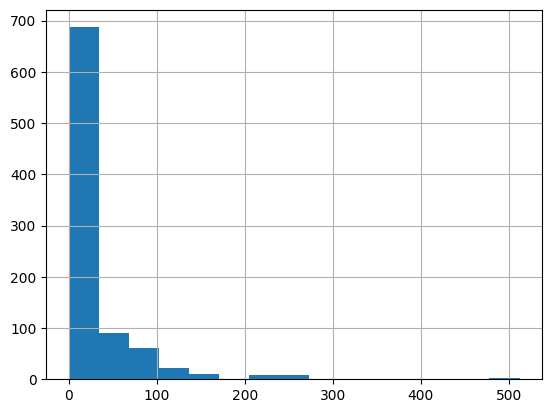

In [139]:
train_data['Fare'].hist(bins=15)

In [140]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [141]:
test_data['Age'] = test_data['Age'].fillna(train_data['Age'].median(skipna=True))
test_data['Fare'] = test_data['Fare'].fillna(train_data['Fare'].median())

test_data = test_data.drop('Cabin', axis=1)
test_data['travel_alone'] = np.where((test_data['SibSp'] + test_data['Parch']) > 0, 0, 1)


test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'])
test_data = test_data.drop(['SibSp', 'Parch', 'PassengerId', 'Name', 'Ticket', 'Sex_male'], axis=1)
test_data.head()

,Pclass,Age,Fare,travel_alone,Sex_female,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,7.8292,1,False,False,True,False
1,3,47.0,7.0000,0,True,False,False,True
2,2,62.0,9.6875,1,False,False,True,False
3,3,27.0,8.6625,1,False,False,False,True
4,3,22.0,12.2875,0,True,False,False,True


In [144]:
test_data.columns

Index(['Pclass', 'Age', 'Fare', 'travel_alone', 'Sex_female', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [146]:
final_test = test_data.copy()

In [145]:
final_train.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Sex_female', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'travel_alone'],
      dtype='object')

In [155]:
feature_cols = final_test.columns

X = final_train[feature_cols]
y = final_train['Survived']

model = LogisticRegression()
log_r = model.fit(X, y)



c:\Users\Roman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [151]:
y_pred = log_r.predict(X)


In [152]:
accuracy_score(y, y_pred)

0.7901234567901234

In [153]:
final_test['Survived'] = log_r.predict(final_test[feature_cols])

In [154]:
final_test

,Pclass,Age,Fare,travel_alone,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,34.5,7.8292,1,False,False,True,False,0
1,3,47.0,7.0000,0,True,False,False,True,0
2,2,62.0,9.6875,1,False,False,True,False,0
3,3,27.0,8.6625,1,False,False,False,True,0
4,3,22.0,12.2875,0,True,False,False,True,1
...,...,...,...,...,...,...,...,...,...
413,3,28.0,8.0500,1,False,False,False,True,0
414,1,39.0,108.9000,1,True,True,False,False,1
415,3,38.5,7.2500,1,False,False,False,True,0
416,3,28.0,8.0500,1,False,False,False,True,0
